# Which events were the most impactful?

#### When did they occur? What type were they? Where did they occur?
#### Quantify the damages to people and property

In [4]:
!pip install pyexasol
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
# Load in the stuffs
import pandas as pd
import pyexasol

pd.set_option("display.max_colwidth", None)
def print_query(query, connection):
    stmt = connection.export_to_pandas(query)
    print(stmt.head())
    return stmt

host = '192.168.56.101/3D518979E1BE8B4E0A23B7A296E6AD35D5EC29DCCE01E5CC6ECBA7C9E38D8E96:8563'  # Don't forget to change the fingerprint
user = 'sys'
password = 'exasol'

# Connect to Exasol
conn = pyexasol.connect(dsn=host, 
                        user=user, 
                        password=password, 
                        debug=False, 
                        protocol_version=pyexasol.PROTOCOL_V1)

In [3]:
pd.set_option('display.max_rows', None)

#### Overall Human damage

In [16]:
# Top 10 most destructive events in number of injuries + deaths both direct and indirect
q = '''
SELECT 
    T.EVENT_ID, 
    T.EVENT_TYPE,
    T.REGION,
    T.BEGIN_DATE_TIME,
    T.END_DATE_TIME,
    SUM(T.INJURIES_DIRECT) AS SUM_INJURIES_DIRECT,
    SUM(T.INJURIES_INDIRECT) AS SUM_INJURIES_INDIRECT,
    SUM(T.DEATHS_DIRECT) AS SUM_DEATHS_DIRECT,
    SUM(T.DEATHS_INDIRECT) AS SUM_DEATHS_INDIRECT,
    SUM(COALESCE((T.INJURIES_DIRECT + T.INJURIES_INDIRECT + T.DEATHS_DIRECT + T.DEATHS_INDIRECT), 0)) AS HUMAN_DAMAGE,
    SUM(COALESCE((T.DAMAGE_PROPERTY + T.DAMAGE_CROPS), 0)) AS NON_HUMAN_DAMAGE
FROM 
    AOL_SCHEMA.WEATHER_EVENTS AS T
WHERE 
    MONTH(T.BEGIN_DATE_TIME) >= 3.0
GROUP BY 
    T.EVENT_ID,
    T.BEGIN_DATE_TIME,
    T.END_DATE_TIME,
    T.EVENT_TYPE,
    T.REGION
ORDER BY
    HUMAN_DAMAGE DESC
LIMIT 10;
'''

overall_human_df = print_query(q, conn)
overall_human_df

   EVENT_ID EVENT_TYPE     REGION             BEGIN_DATE_TIME  \
0   5506267    Tornado   Missouri  2006-04-02 17:54:00.000000   
1   5500766    Tornado  Tennessee  2006-04-07 13:12:00.000000   
2   5506368    Tornado  Tennessee  2006-04-02 18:32:00.000000   
3   5506369    Tornado  Tennessee  2006-04-02 19:09:00.000000   
4   5506240    Tornado   Arkansas  2006-04-02 16:46:00.000000   

                END_DATE_TIME  SUM_INJURIES_DIRECT  SUM_INJURIES_INDIRECT  \
0  2006-04-02 18:25:00.000000                  130                      0   
1  2006-04-07 13:32:00.000000                  121                      0   
2  2006-04-02 18:55:00.000000                   70                      0   
3  2006-04-02 19:31:00.000000                   42                      0   
4  2006-04-02 17:37:00.000000                   47                      0   

   SUM_DEATHS_DIRECT  SUM_DEATHS_INDIRECT  HUMAN_DAMAGE  NON_HUMAN_DAMAGE  
0                  2                    0           132               

,EVENT_ID,EVENT_TYPE,REGION,BEGIN_DATE_TIME,END_DATE_TIME,SUM_INJURIES_DIRECT,SUM_INJURIES_INDIRECT,SUM_DEATHS_DIRECT,SUM_DEATHS_INDIRECT,HUMAN_DAMAGE,NON_HUMAN_DAMAGE
0,5506267,Tornado,Missouri,2006-04-02 17:54:00.000000,2006-04-02 18:25:00.000000,130,0,2,0,132,0
1,5500766,Tornado,Tennessee,2006-04-07 13:12:00.000000,2006-04-07 13:32:00.000000,121,0,7,0,128,0
2,5506368,Tornado,Tennessee,2006-04-02 18:32:00.000000,2006-04-02 18:55:00.000000,70,0,16,0,86,0
3,5506369,Tornado,Tennessee,2006-04-02 19:09:00.000000,2006-04-02 19:31:00.000000,42,0,6,0,48,0
4,5506240,Tornado,Arkansas,2006-04-02 16:46:00.000000,2006-04-02 17:37:00.000000,47,0,0,0,47,0
5,5497925,Tornado,Missouri,2006-03-12 21:18:00.000000,2006-03-12 21:33:00.000000,26,0,4,0,30,0
6,5502578,Tornado,Iowa,2006-04-13 19:29:00.000000,2006-04-13 19:37:00.000000,30,0,0,0,30,0
7,5512771,Heat,Michigan,2006-05-29 12:00:00.000000,2006-05-29 18:00:00.000000,28,0,0,0,28,0
8,5501849,Tornado,Kentucky,2006-04-02 19:50:00.000000,2006-04-02 20:11:00.000000,22,0,0,0,22,0
9,5496254,Wildfire,Texas,2006-03-12 11:00:00.000000,2006-03-18 18:00:00.000000,8,0,12,0,20,18201000


#### Overall Non-Human damage

In [11]:
# top 10 most damaging events to property and crops in USD
q = '''
SELECT 
    T.EVENT_ID, 
    T.EVENT_TYPE,
    T.REGION,
    T.BEGIN_DATE_TIME,
    T.END_DATE_TIME,
    SUM(T.INJURIES_DIRECT) AS SUM_INJURIES_DIRECT,
    SUM(T.INJURIES_INDIRECT) AS SUM_INJURIES_INDIRECT,
    SUM(T.DEATHS_DIRECT) AS SUM_DEATHS_DIRECT,
    SUM(T.DEATHS_INDIRECT) AS SUM_DEATHS_INDIRECT,
    SUM(COALESCE((T.INJURIES_DIRECT + T.INJURIES_INDIRECT + T.DEATHS_DIRECT + T.DEATHS_INDIRECT), 0)) AS HUMAN_DAMAGE,
    SUM(COALESCE((T.DAMAGE_PROPERTY + T.DAMAGE_CROPS), 0)) AS NON_HUMAN_DAMAGE
FROM 
    AOL_SCHEMA.WEATHER_EVENTS AS T
WHERE 
    MONTH(T.BEGIN_DATE_TIME) >= 3.0
GROUP BY 
    T.EVENT_ID,
    T.BEGIN_DATE_TIME,
    T.END_DATE_TIME,
    T.EVENT_TYPE,
    T.REGION
ORDER BY
    NON_HUMAN_DAMAGE DESC 
LIMIT 10;
'''
overall_non_human_df = print_query(q, conn)
overall_non_human_df

   EVENT_ID   EVENT_TYPE      REGION             BEGIN_DATE_TIME  \
0   5498400      Drought       Texas  2006-03-01 00:00:00.000000   
1   5513319      Drought       Texas  2006-05-01 00:00:00.000000   
2   5503659     Wildfire       Texas  2006-04-11 12:00:00.000000   
3   5496255     Wildfire       Texas  2006-03-12 11:30:00.000000   
4   5497354  Debris Flow  California  2006-04-01 18:00:00.000000   

                END_DATE_TIME  SUM_INJURIES_DIRECT  SUM_INJURIES_INDIRECT  \
0  2006-03-31 23:59:00.000000                    0                      0   
1  2006-05-08 23:59:00.000000                    0                      0   
2  2006-04-13 17:00:00.000000                    2                      0   
3  2006-03-18 18:00:00.000000                    0                      0   
4  2006-04-15 12:00:00.000000                    0                      0   

   SUM_DEATHS_DIRECT  SUM_DEATHS_INDIRECT  HUMAN_DAMAGE  NON_HUMAN_DAMAGE  
0                  0                    0           

,EVENT_ID,EVENT_TYPE,REGION,BEGIN_DATE_TIME,END_DATE_TIME,SUM_INJURIES_DIRECT,SUM_INJURIES_INDIRECT,SUM_DEATHS_DIRECT,SUM_DEATHS_INDIRECT,HUMAN_DAMAGE,NON_HUMAN_DAMAGE
0,5498400,Drought,Texas,2006-03-01 00:00:00.000000,2006-03-31 23:59:00.000000,0,0,0,0,0,200001000
1,5513319,Drought,Texas,2006-05-01 00:00:00.000000,2006-05-08 23:59:00.000000,0,0,0,0,0,100001000
2,5503659,Wildfire,Texas,2006-04-11 12:00:00.000000,2006-04-13 17:00:00.000000,2,0,0,0,2,90001000
3,5496255,Wildfire,Texas,2006-03-12 11:30:00.000000,2006-03-18 18:00:00.000000,0,0,0,0,0,27201000
4,5497354,Debris Flow,California,2006-04-01 18:00:00.000000,2006-04-15 12:00:00.000000,0,0,1,0,1,20001000
5,5496254,Wildfire,Texas,2006-03-12 11:00:00.000000,2006-03-18 18:00:00.000000,8,0,12,0,20,18201000
6,5501922,Heavy Rain,California,2006-04-02 15:00:00.000000,2006-04-05 15:00:00.000000,0,0,0,0,0,16601000
7,5501923,Heavy Rain,California,2006-04-02 16:00:00.000000,2006-04-05 16:00:00.000000,0,0,0,0,0,16001000
8,5501925,Heavy Rain,California,2006-04-02 18:00:00.000000,2006-04-05 18:00:00.000000,0,0,0,0,0,9101000
9,5501932,Flood,California,2006-04-05 12:00:00.000000,2006-04-08 12:00:00.000000,0,0,0,0,0,5801000


#### Most destructive events per region

In [13]:
# Most destructive events per region with more than 0 human damage factor and more than 0 non-human damage factor
q = '''
WITH RankedEvents AS (
    SELECT 
        T.EVENT_ID, 
        T.EVENT_TYPE,
        T.REGION,
        T.BEGIN_DATE_TIME,
        T.END_DATE_TIME,
        SUM(T.INJURIES_DIRECT) AS SUM_INJURIES_DIRECT,
        SUM(T.INJURIES_INDIRECT) AS SUM_INJURIES_INDIRECT,
        SUM(T.DEATHS_DIRECT) AS SUM_DEATHS_DIRECT,
        SUM(T.DEATHS_INDIRECT) AS SUM_DEATHS_INDIRECT,
        SUM(COALESCE(T.INJURIES_DIRECT, 0) + COALESCE(T.INJURIES_INDIRECT, 0) + COALESCE(T.DEATHS_DIRECT, 0) + COALESCE(T.DEATHS_INDIRECT, 0)) AS HUMAN_DAMAGE,
        SUM(COALESCE(T.DAMAGE_PROPERTY, 0) + COALESCE(T.DAMAGE_CROPS, 0)) AS NON_HUMAN_DAMAGE,
        RANK() OVER(PARTITION BY T.REGION ORDER BY SUM(COALESCE(T.DAMAGE_PROPERTY, 0) + COALESCE(T.DAMAGE_CROPS, 0)) DESC) AS NON_HUMAN_DAMAGE_RANK,
        RANK() OVER(PARTITION BY T.REGION ORDER BY SUM(COALESCE(T.INJURIES_DIRECT, 0) + COALESCE(T.INJURIES_INDIRECT, 0) + COALESCE(T.DEATHS_DIRECT, 0) + COALESCE(T.DEATHS_INDIRECT, 0)) DESC) AS HUMAN_DAMAGE_RANK
    FROM 
        AOL_SCHEMA.WEATHER_EVENTS AS T
    WHERE 
        MONTH(T.BEGIN_DATE_TIME) >= 3.0
    GROUP BY 
        T.EVENT_ID,
        T.BEGIN_DATE_TIME,
        T.END_DATE_TIME,
        T.EVENT_TYPE,
        T.REGION
)
SELECT 
    *
FROM 
    RankedEvents
WHERE 
    (NON_HUMAN_DAMAGE_RANK = 1 
    OR HUMAN_DAMAGE_RANK = 1)
    AND HUMAN_DAMAGE > 0
    AND NON_HUMAN_DAMAGE > 0;
'''

region_df = print_query(q, conn)
print(region_df.shape)
region_df

   EVENT_ID         EVENT_TYPE         REGION             BEGIN_DATE_TIME  \
0   5494873           Wildfire       Maryland  2006-03-17 08:20:00.000000   
1   5513521              Flood  Massachusetts  2006-05-13 10:30:00.000000   
2   5512489  Thunderstorm Wind  Massachusetts  2006-05-21 16:58:00.000000   
3   5513535  Thunderstorm Wind  Massachusetts  2006-05-21 16:58:00.000000   
4   5512771               Heat       Michigan  2006-05-29 12:00:00.000000   

                END_DATE_TIME  SUM_INJURIES_DIRECT  SUM_INJURIES_INDIRECT  \
0  2006-03-17 15:30:00.000000                    2                      0   
1  2006-05-15 19:00:00.000000                    0                      0   
2  2006-05-21 17:05:00.000000                    1                      0   
3  2006-05-21 17:05:00.000000                    1                      0   
4  2006-05-29 18:00:00.000000                   28                      0   

   SUM_DEATHS_DIRECT  SUM_DEATHS_INDIRECT  HUMAN_DAMAGE  NON_HUMAN_DAMAGE 

,EVENT_ID,EVENT_TYPE,REGION,BEGIN_DATE_TIME,END_DATE_TIME,SUM_INJURIES_DIRECT,SUM_INJURIES_INDIRECT,SUM_DEATHS_DIRECT,SUM_DEATHS_INDIRECT,HUMAN_DAMAGE,NON_HUMAN_DAMAGE,NON_HUMAN_DAMAGE_RANK,HUMAN_DAMAGE_RANK
0,5494873,Wildfire,Maryland,2006-03-17 08:20:00.000000,2006-03-17 15:30:00.000000,2,0,0,0,2,1000,1,1
1,5513521,Flood,Massachusetts,2006-05-13 10:30:00.000000,2006-05-15 19:00:00.000000,0,0,2,0,2,1000,1,1
2,5512489,Thunderstorm Wind,Massachusetts,2006-05-21 16:58:00.000000,2006-05-21 17:05:00.000000,1,0,0,0,1,1000,1,2
3,5513535,Thunderstorm Wind,Massachusetts,2006-05-21 16:58:00.000000,2006-05-21 17:05:00.000000,1,0,0,0,1,1000,1,2
4,5512771,Heat,Michigan,2006-05-29 12:00:00.000000,2006-05-29 18:00:00.000000,28,0,0,0,28,1000,31,1
5,5491231,Thunderstorm Wind,Mississippi,2006-03-09 15:27:00.000000,2006-03-09 15:43:00.000000,3,0,0,0,3,1000,16,1
6,5505505,Thunderstorm Wind,Mississippi,2006-05-04 19:08:00.000000,2006-05-04 19:12:00.000000,3,0,0,0,3,1000,16,1
7,5506267,Tornado,Missouri,2006-04-02 17:54:00.000000,2006-04-02 18:25:00.000000,130,0,2,0,132,1000,2,1
8,5507865,High Wind,Nebraska,2006-05-26 23:00:00.000000,2006-05-26 23:40:00.000000,5,0,0,0,5,1000,6,1
9,5511947,Strong Wind,Nevada,2006-05-27 16:30:00.000000,2006-05-27 16:30:00.000000,0,0,1,0,1,1000,1,1


#### Total non-human damage by region and start month

In [14]:
q = '''
WITH NewWeatherData AS (
    SELECT 
        MONTH(BEGIN_DATE_TIME) AS BEGIN_MON,
        REGION,
        COALESCE(DAMAGE_PROPERTY, 0) + COALESCE(DAMAGE_CROPS, 0) AS NON_HUMAN_DESTRUCTION
    FROM 
        AOL_SCHEMA.WEATHER_EVENTS
    WHERE
        MONTH(BEGIN_DATE_TIME) >= 3.0
)
SELECT 
    BEGIN_MON,
    REGION,
    SUM(NON_HUMAN_DESTRUCTION) AS TOTAL_DESTRUCTION
FROM 
    NewWeatherData
GROUP BY 
    CUBE(BEGIN_MON, REGION)
ORDER BY 
    BEGIN_MON,
    REGION;
'''

cube_non_human_df = print_query(q, conn)
print(cube_non_human_df.shape)
cube_non_human_df


   BEGIN_MON          REGION  TOTAL_DESTRUCTION
0        3.0         Alabama              82000
1        3.0          Alaska              44000
2        3.0         Arizona              30000
3        3.0        Arkansas             212000
4        3.0  Atlantic south               6000
(242, 3)


,BEGIN_MON,REGION,TOTAL_DESTRUCTION
0,3.0,Alabama,82000
1,3.0,Alaska,44000
2,3.0,Arizona,30000
3,3.0,Arkansas,212000
4,3.0,Atlantic south,6000
5,3.0,California,350000
6,3.0,Colorado,124000
7,3.0,Connecticut,8000
8,3.0,Delaware,11000
9,3.0,E pacific,2000


#### Total human damage by region and start month

In [ ]:
q = '''
WITH NewWeatherData AS (
    SELECT 
        MONTH(BEGIN_DATE_TIME) AS BEGIN_MON,
        REGION,
        COALESCE(INJURIES_DIRECT, 0) + COALESCE(INJURIES_INDIRECT, 0) + COALESCE(DEATHS_DIRECT, 0) + COALESCE(DEATHS_INDIRECT, 0) AS HUMAN_DAMAGE
    FROM 
        AOL_SCHEMA.WEATHER_EVENTS
    WHERE
        MONTH(BEGIN_DATE_TIME) >= 3.0
)
SELECT 
    BEGIN_MON,
    REGION,
    SUM(HUMAN_DAMAGE) AS TOTAL_HUMAN_DAMAGE
FROM 
    NewWeatherData
GROUP BY 
    CUBE(BEGIN_MON, REGION)
ORDER BY 
    BEGIN_MON,
    REGION;
'''

cube_human_df = print_query(q, conn)
print(cube_human_df.shape)
cube_human_df


#### Total destruction by region and start month (both human and non human)

In [6]:
q = '''
WITH NewWeatherData AS (
    SELECT 
        MONTH(BEGIN_DATE_TIME) AS BEGIN_MON,
        REGION,
        COALESCE(INJURIES_DIRECT, 0) + COALESCE(INJURIES_INDIRECT, 0) + COALESCE(DEATHS_DIRECT, 0) + COALESCE(DEATHS_INDIRECT, 0) AS HUMAN_DAMAGE,
        COALESCE(DAMAGE_PROPERTY, 0) + COALESCE(DAMAGE_CROPS, 0) AS NON_HUMAN_DAMAGE
    FROM 
        AOL_SCHEMA.WEATHER_EVENTS
    WHERE
        MONTH(BEGIN_DATE_TIME) >= 3.0
)
SELECT 
    BEGIN_MON,
    REGION,
    SUM(HUMAN_DAMAGE) AS TOTAL_HUMAN_DAMAGE,
    SUM(NON_HUMAN_DAMAGE) AS TOTAL_NON_HUMAN_DAMAGE
FROM 
    NewWeatherData
GROUP BY 
    CUBE(BEGIN_MON, REGION)
ORDER BY 
    BEGIN_MON,
    REGION;
'''

cube_df = print_query(q, conn)
print(cube_df.shape)
cube_df

   BEGIN_MON          REGION  TOTAL_HUMAN_DAMAGE  TOTAL_NON_HUMAN_DAMAGE
0        3.0         Alabama                   3                   82000
1        3.0          Alaska                   0                   44000
2        3.0         Arizona                   3                   30000
3        3.0        Arkansas                  19                  212000
4        3.0  Atlantic south                   0                    6000
(242, 4)


,BEGIN_MON,REGION,TOTAL_HUMAN_DAMAGE,TOTAL_NON_HUMAN_DAMAGE
0,3.0,Alabama,3,82000
1,3.0,Alaska,0,44000
2,3.0,Arizona,3,30000
3,3.0,Arkansas,19,212000
4,3.0,Atlantic south,0,6000
...,...,...,...,...
237,NaN,Washington,3,56000
238,NaN,West virginia,3,119000
239,NaN,Wisconsin,7,535000
240,NaN,Wyoming,0,47000


#### INFO EXTRACTION

In [7]:
# Note the most destructive month in terms of personel and property damage
# Note the most destructive state in terms of personel and property damage
# Note totals across all months and locales


# Note, all maximums are over a 3 month period march 2006 to may 2006
print("All maximums are over a 3 month period march 2006 to may 2006\n\n")

# Maximum month:
month_filtered_df = cube_df.loc[pd.isna(cube_df['REGION'])].loc[pd.notna(cube_df['BEGIN_MON'])]
print("MAX human damage month:\n", month_filtered_df.loc[month_filtered_df['TOTAL_HUMAN_DAMAGE'].idxmax()][['BEGIN_MON', 'TOTAL_HUMAN_DAMAGE', 'TOTAL_NON_HUMAN_DAMAGE']])  # Month, damages, with max human damage 
print("\n\nMAX non-human damage month:\n", month_filtered_df.loc[month_filtered_df['TOTAL_NON_HUMAN_DAMAGE'].idxmax()][['BEGIN_MON', 'TOTAL_HUMAN_DAMAGE', 'TOTAL_NON_HUMAN_DAMAGE']])  # Month, damages, with max non human damage


# Maximum Region:
region_filtered_df = cube_df.loc[pd.isna(cube_df['BEGIN_MON'])].loc[pd.notna(cube_df['REGION'])]
print("\n\nMAX human damage region:\n", region_filtered_df.loc[region_filtered_df['TOTAL_HUMAN_DAMAGE'].idxmax()][['REGION', 'TOTAL_HUMAN_DAMAGE', 'TOTAL_NON_HUMAN_DAMAGE']])  # Total human damage max
print("\n\nMAX non-human damage region:\n", region_filtered_df.loc[region_filtered_df['TOTAL_NON_HUMAN_DAMAGE'].idxmax()][['REGION', 'TOTAL_HUMAN_DAMAGE', 'TOTAL_NON_HUMAN_DAMAGE']])  # Total non-human damage max


# Damage Totals:
print("\n\nDamage Totals:\n", cube_df.loc[pd.isna(cube_df['REGION'])].loc[pd.isna(cube_df['BEGIN_MON'])].drop(['BEGIN_MON', 'REGION'], axis=1))  # Totals

All maximums are over a 3 month period march 2006 to may 2006


MAX human damage month:
 BEGIN_MON                       4.0
TOTAL_HUMAN_DAMAGE              651
TOTAL_NON_HUMAN_DAMAGE    184749000
Name: 115, dtype: object


MAX non-human damage month:
 BEGIN_MON                       3.0
TOTAL_HUMAN_DAMAGE              348
TOTAL_NON_HUMAN_DAMAGE    251455000
Name: 57, dtype: object


MAX human damage region:
 REGION                    Tennessee
TOTAL_HUMAN_DAMAGE              298
TOTAL_NON_HUMAN_DAMAGE       833000
Name: 231, dtype: object


MAX non-human damage region:
 REGION                        Texas
TOTAL_HUMAN_DAMAGE               71
TOTAL_NON_HUMAN_DAMAGE    445340000
Name: 232, dtype: object


Damage Totals:
      TOTAL_HUMAN_DAMAGE  TOTAL_NON_HUMAN_DAMAGE
241                1193               552651300


#### VISUALIZATION - HEATMAPS

     BEGIN_MON          REGION  TOTAL_HUMAN_DAMAGE  TOTAL_NON_HUMAN_DAMAGE
0          3.0         Alabama                   3                   82000
1          3.0          Alaska                   0                   44000
2          3.0         Arizona                   3                   30000
3          3.0        Arkansas                  19                  212000
4          3.0  Atlantic south                   0                    6000
..         ...             ...                 ...                     ...
171        5.0        Virginia                   0                   53000
172        5.0      Washington                   0                   27000
173        5.0   West virginia                   0                   47000
174        5.0       Wisconsin                   7                  315000
175        5.0         Wyoming                   0                   23000

[174 rows x 4 columns]


/tmp/ipykernel_5615/4274026195.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  human_heatmap_data = cube_df.dropna().pivot('BEGIN_MON', 'REGION', 'TOTAL_HUMAN_DAMAGE')


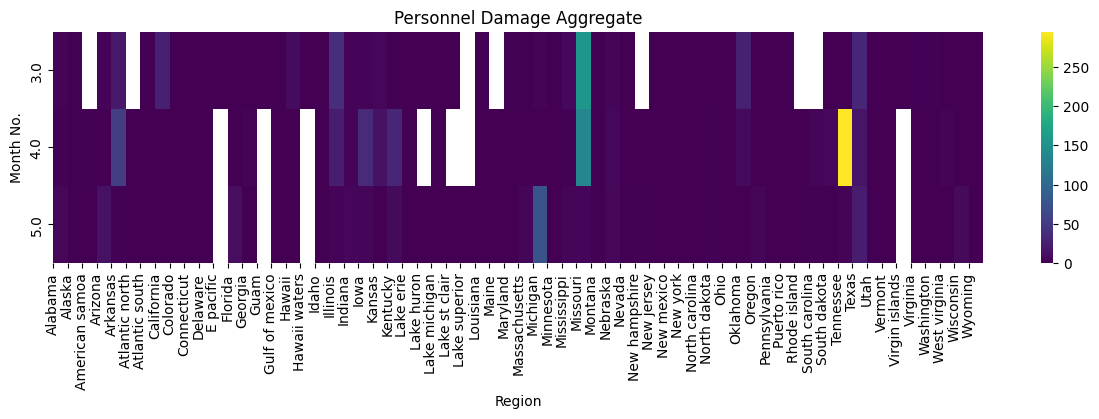

/tmp/ipykernel_5615/4274026195.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  non_human_heatmap_data = cube_df.dropna().pivot('BEGIN_MON', 'REGION', 'TOTAL_NON_HUMAN_DAMAGE')


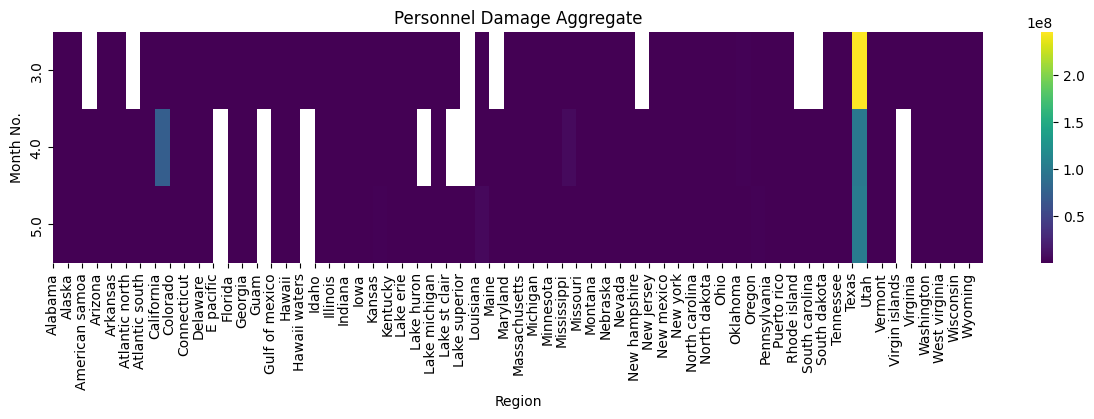

In [29]:
# Take cube df, create a heatmap for personel damage and property damage
import matplotlib.pyplot as plt
import seaborn as sns


print(cube_df.dropna())

# Human damage heatmap
human_heatmap_data = cube_df.dropna().pivot('BEGIN_MON', 'REGION', 'TOTAL_HUMAN_DAMAGE')
plt.figure(figsize=(15, 3))
sns.heatmap(human_heatmap_data, cmap="viridis")

plt.title("Personnel Damage Aggregate")
plt.xlabel("Region")
plt.ylabel("Month No.")

tick_positions = range(len(human_heatmap_data.columns))
plt.xticks(ticks=tick_positions, labels=human_heatmap_data.columns, rotation=90)
plt.savefig("personnel_heatmap_plot.png", format="png", bbox_inches="tight")  # Save as PNG
plt.show()


# Non human damage heatmap
non_human_heatmap_data = cube_df.dropna().pivot('BEGIN_MON', 'REGION', 'TOTAL_NON_HUMAN_DAMAGE')
plt.figure(figsize=(15, 3))
sns.heatmap(non_human_heatmap_data, cmap="viridis")

plt.title("Property Damage Aggregate")
plt.xlabel("Region")
plt.ylabel("Month No.")

tick_positions = range(len(non_human_heatmap_data.columns))
plt.xticks(ticks=tick_positions, labels=non_human_heatmap_data.columns, rotation=90)
plt.savefig("property_heatmap_plot.png", format="png", bbox_inches="tight")  # Save as PNG
plt.show()
